# Assignment 3: Titanic Survival Prediction using Decision Tree
    Task:
        1. Load the Titanic dataset.
        2. Perform basic data preprocessing:
            a. Handle missing values (e.g., in the "Age" and "Embarked" columns).
            b. Convert categorical features to numeric using label encoding or one-hot encoding.
        3. Split the data into training and testing sets (80% training, 20% testing).
        4. Train a Decision Tree Classifier on the training data.
        5. Visualize the decision tree.
        6. Evaluate the model using accuracy, confusion matrix, and classification report.
        7. Test the classifier with this input: ['3', 'male', '22', '0', '0', '7.25', 'S'].
    Expected Output:
        • Confusion Matrix and Classification Report
        • Visualization of the Decision Tree
        • Prediction of survival for the provided input

In [19]:
import pandas as pd

In [20]:
df_titanic = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv')
x_col = ['sex', 'age', 'embarked', 'boat', 'body', 'pclass', 'fare']
y_col = 'survived'

df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
df_titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [22]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [23]:
df_titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [24]:
clean_df_titanic = df_titanic[~df_titanic['embarked'].isna()]
clean_df_titanic = clean_df_titanic[~df_titanic['fare'].isna()]
clean_df_titanic['age'] = clean_df_titanic['age'].fillna(0)

clean_df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1306 non-null   int64  
 1   survived   1306 non-null   int64  
 2   name       1306 non-null   object 
 3   sex        1306 non-null   object 
 4   age        1306 non-null   float64
 5   sibsp      1306 non-null   int64  
 6   parch      1306 non-null   int64  
 7   ticket     1306 non-null   object 
 8   fare       1306 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       484 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  744 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 153.0+ KB


/tmp/ipykernel_251019/1572493514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df_titanic = clean_df_titanic[~df_titanic['fare'].isna()]


In [25]:
clean_df_titanic['body'] = clean_df_titanic['body'].apply(lambda x: 1 if pd.notna(x) else 0)
clean_df_titanic['boat'] = clean_df_titanic['boat'].apply(lambda x: 1 if pd.notna(x) else 0)

clean_df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,1,0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1,0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0,0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,0,1,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,0,0,"Montreal, PQ / Chesterville, ON"


In [26]:
X = clean_df_titanic[x_col]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1306 non-null   object 
 1   age       1306 non-null   float64
 2   embarked  1306 non-null   object 
 3   boat      1306 non-null   int64  
 4   body      1306 non-null   int64  
 5   pclass    1306 non-null   int64  
 6   fare      1306 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 81.6+ KB


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['sex', 'embarked'])], remainder='passthrough')
x_clean = np.array(ct.fit_transform(X))
print(x_clean)
print(x_clean.shape)

[[  1.       0.       0.     ...   0.       1.     211.3375]
 [  0.       1.       0.     ...   0.       1.     151.55  ]
 [  1.       0.       0.     ...   0.       1.     151.55  ]
 ...
 [  0.       1.       1.     ...   1.       3.       7.225 ]
 [  0.       1.       1.     ...   0.       3.       7.225 ]
 [  0.       1.       0.     ...   0.       3.       7.875 ]]
(1306, 10)


In [34]:
y_clean = clean_df_titanic[y_col]
y_clean.info()

<class 'pandas.core.series.Series'>
Index: 1306 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype
--------------  -----
1306 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [39]:
print(conf_matrix)

[[145   9]
 [  7 101]]


In [40]:
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       154
           1       0.92      0.94      0.93       108

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



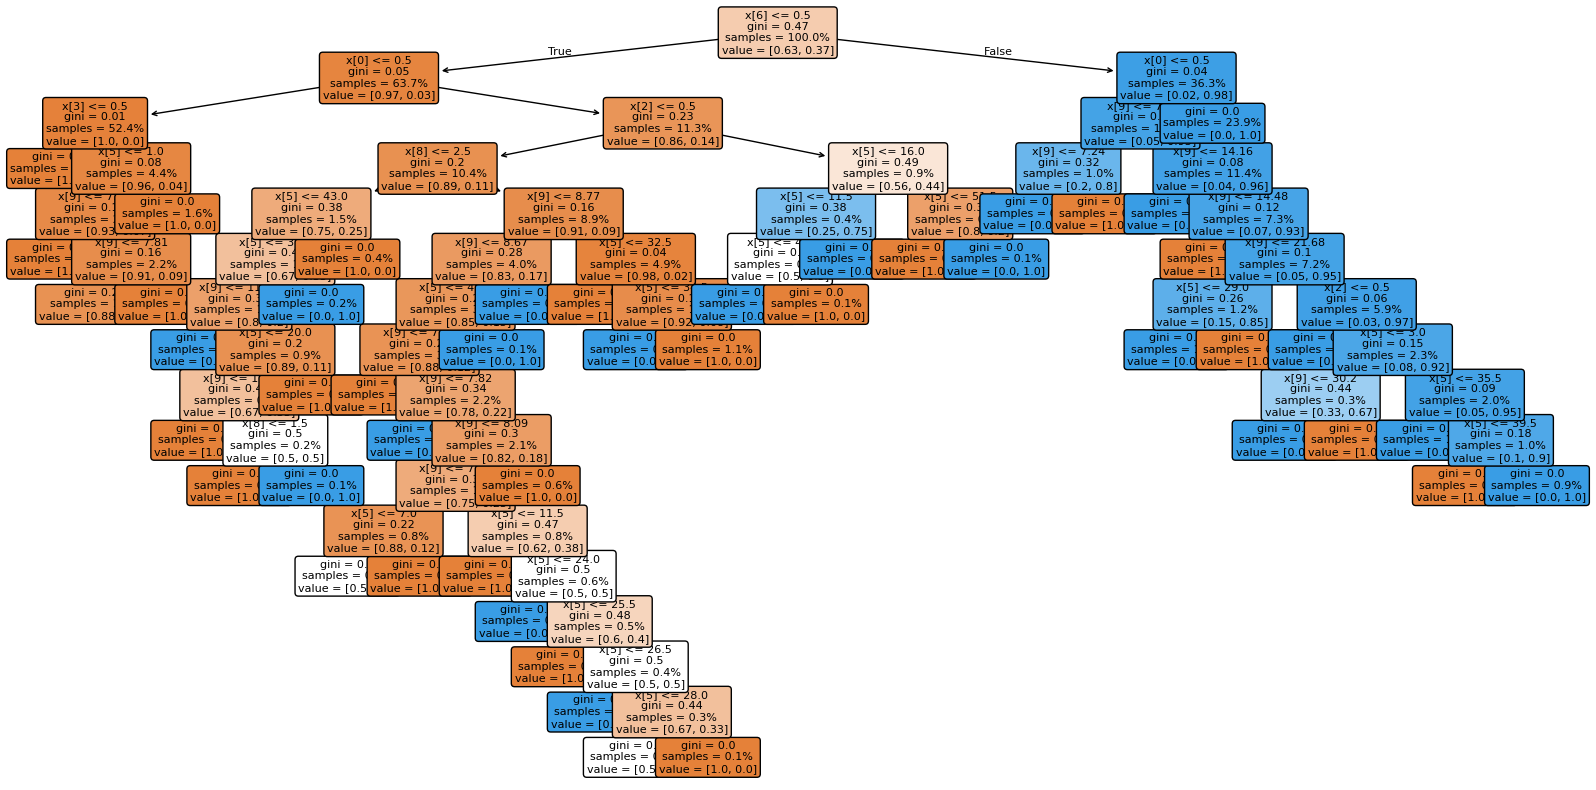

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Increase the figure size for better readability

# Plot the tree with detailed information
plot_tree(
    classifier, 
    filled=True, 
    rounded=True, 
    precision=2,  # Display precision for threshold values
    fontsize=8,   # Adjust font size for better readability
    proportion=True  # Show proportions of classes at each node
)
plt.savefig('DT2')
plt.show()

In [44]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [55]:
import pandas as pd

# Define the column headers
new_input_columns = ['sex', 'age', 'embarked', 'boat', 'body', 'pclass', 'fare']

# Define the data (single row)
new_input_data = [['male', '22', 'S', '0', '0', '3', '7.25']]

# Create the DataFrame
df_new_input = pd.DataFrame(new_input_data, columns=new_input_columns)

df_new_input = ct.transform(df_new_input)

predicted_class = classifier.predict(df_new_input)
predicted_class

array([0])